In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
df=pd.read_csv('Credit.csv')
df

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
5,6,80.180,8047,569,4,77,10,Male,No,No,Caucasian,1151
6,7,20.996,3388,259,2,37,12,Female,No,No,African American,203
7,8,71.408,7114,512,2,87,9,Male,No,No,Asian,872
8,9,15.125,3300,266,5,66,13,Female,No,No,Caucasian,279
9,10,71.061,6819,491,3,41,19,Female,Yes,Yes,African American,1350


In [3]:
df=df.drop('Unnamed: 0',axis=1)

In [4]:
df['Married'].value_counts()

Yes    245
No     155
Name: Married, dtype: int64

In [5]:
df['Gender'].value_counts()

Female    207
 Male     193
Name: Gender, dtype: int64

In [6]:
df['Student'].value_counts()

No     360
Yes     40
Name: Student, dtype: int64

In [7]:
df['Ethnicity'].value_counts()

Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64

In [8]:
df['Male']=df['Gender'].replace(['Male','Female'],[1,0])
df['Student']=df['Student'].replace(['No','Yes'],[0,1])
df['Married']=df['Married'].replace(['No','Yes'],[0,1])
df['AfrAmerican']=np.where(df['Ethnicity']=='African American',1,0)
df['Asian']=np.where(df['Ethnicity']=='Asian',1,0)                        

In [9]:
def plot_hist(dataframe,variable):
    media=(dataframe[variable].dropna()).mean()
    mediana=dataframe[variable].dropna().median()
    return(plt.hist(df[variable].dropna(),color='grey',alpha=.4),
          plt.axvline(media,color='tomato',linestyle=('--'),label='Media'),
          plt.axvline(mediana,color='blue',linestyle=('--'),label='Mediana'),
           plt.title('Histograma'),
          plt.legend())
    
    

((array([138.,  45.,  53.,  47.,  48.,  32.,  21.,  11.,   3.,   2.]),
  array([   0. ,  199.9,  399.8,  599.7,  799.6,  999.5, 1199.4, 1399.3,
         1599.2, 1799.1, 1999. ]),
  <a list of 10 Patch objects>),
 Text(0.5,1,'Histograma'),
 <matplotlib.legend.Legend at 0x92eec50>)

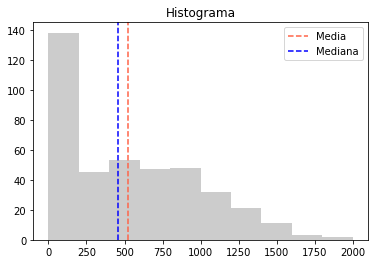

In [10]:
plot_hist(df,'Balance')

((array([163., 103.,  52.,  30.,  14.,  14.,   8.,   7.,   5.,   4.]),
  array([ 10.354,  27.982,  45.61 ,  63.238,  80.866,  98.494, 116.122,
         133.75 , 151.378, 169.006, 186.634]),
  <a list of 10 Patch objects>),
 Text(0.5,1,'Histograma'),
 <matplotlib.legend.Legend at 0x9368f10>)

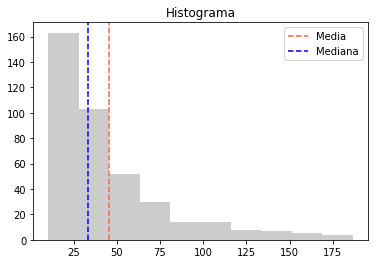

In [11]:
plot_hist(df,'Income')

((array([ 51., 115., 111.,  72.,   0.,  34.,  11.,   4.,   1.,   1.]),
  array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
  <a list of 10 Patch objects>),
 Text(0.5,1,'Histograma'),
 <matplotlib.legend.Legend at 0x93c4a70>)

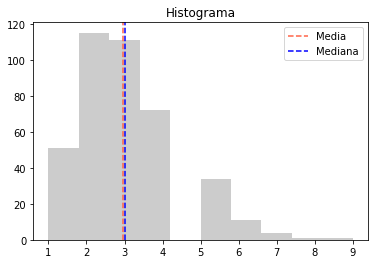

In [12]:
plot_hist(df,'Cards')

((array([51., 79., 86., 91., 47., 23., 11.,  6.,  4.,  2.]),
  array([ 93. , 181.9, 270.8, 359.7, 448.6, 537.5, 626.4, 715.3, 804.2,
         893.1, 982. ]),
  <a list of 10 Patch objects>),
 Text(0.5,1,'Histograma'),
 <matplotlib.legend.Legend at 0x941f0d0>)

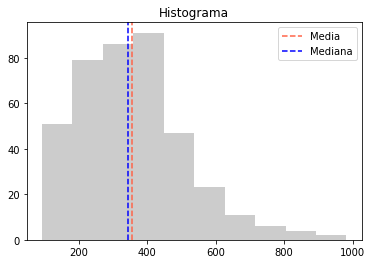

In [13]:
plot_hist(df,'Rating')

In [14]:
#El coportamiento de las variables 
model1 =smf.ols('Balance ~ Student',data =df)
model2 =smf.ols('Balance ~ Income',data =df)
model3=smf.ols('Balance ~ Rating',data =df)


In [15]:
model1=model1.fit()
model2=model2.fit()
model3=model3.fit()

In [16]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Thu, 29 Nov 2018   Prob (F-statistic):           1.49e-07
Time:                        21:25:30   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    480.3694     23.434     20.499      0.000     434.300     526.439
Student      396.4556     74.104      5.350      0.000     250.771     542.140
==============================================================================
Omnibus:                       20.866   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.920
Skew:                           0.544   Prob(JB):                     1.74e-05
Kurtosis:                       2.637   Cond. No.                         3.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     109.0
Date:                Thu, 29 Nov 2018   Prob (F-statistic):           1.03e-22
Time:                        21:25:31   Log-Likelihood:                -2970.9
No. Observations:                 400   AIC:                             5946.
Df Residuals:                     398   BIC:                             5954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.5148     33.199      7.425      0.000     181.247     311.783
Income         6.0484      0.579     10.440      0.000       4.909       7.187
==============================================================================
Omnibus:                       42.505   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.975
Skew:                           0.384   Prob(JB):                     2.79e-05
Kurtosis:                       2.182   Cond. No.                         93.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1168.
Date:                Thu, 29 Nov 2018   Prob (F-statistic):          1.90e-120
Time:                        21:25:31   Log-Likelihood:                -2745.4
No. Observations:                 400   AIC:                             5495.
Df Residuals:                     398   BIC:                             5503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -390.8463     29.069    -13.446      0.000    -447.993    -333.699
Rating         2.5662      0.075     34.176      0.000       2.419       2.714
==============================================================================
Omnibus:                       23.223   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.802
Skew:                           0.390   Prob(JB):                     3.75e-09
Kurtosis:                       4.311   Cond. No.                         970.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Felix\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


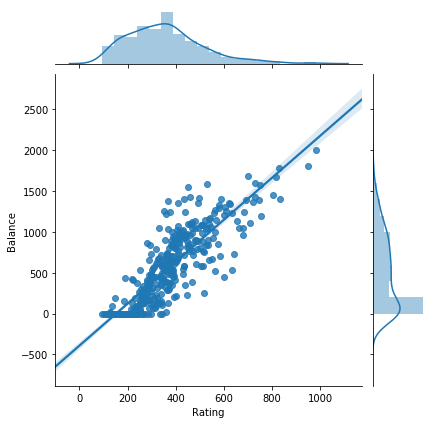

In [19]:
sns.jointplot(df['Rating'],df['Balance'],kind='reg')



In [20]:
#La variable que presenta un mayor poder explicativo de 'Balance' es 'Rating'.
df.loc[df['Student']==0]['Balance'].quantile(.75)- df.loc[df['Student']==0]['Balance'].quantile(.25)



794.25

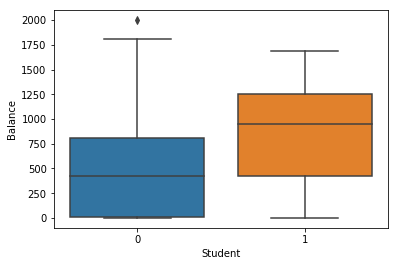

In [21]:
sns.boxplot(x=df['Student'],y=df['Balance'])

In [22]:
model4=smf.ols('Balance ~ Income +Limit +Rating +Cards +Age +Education +Gender +Student +Married +Ethnicity',data =df)
model4=model4.fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Thu, 29 Nov 2018   Prob (F-statistic):          1.11e-253
Time:                        21:25:35   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -479.2079     35.774    -13.395      0.000    -549.543    -408.873
Gender[T.Female]         -10.6532      9.914     -1.075      0.283     -30.145       8.839
Ethnicity[T.Asian]        16.8042     14.119      1.190      0.235     -10.955      44.564
Ethnicity[T.Caucasian]    10.1070     12.210      0.828      0.408     -13.899      34.113
Income                    -7.8031      0.234    -33.314      0.000      -8.264      -7.343
Limit                      0.1909      0.033      5.824      0.000       0.126       0.255
Rating                     1.1365      0.491      2.315      0.021       0.171       2.102
Cards                     17.7245      4.341      4.083      0.000       9.190      26.259
Age                       -0.6139      0.294     -2.088      0.037      -1.192      -0.036
Education                 -1.0989      1.598     -0.688      0.492      -4.241       2.043
Student                  425.7474     16.723     25.459      0.000     392.869     458.626
Married                   -8.5339     10.363     -0.824      0.411     -28.908      11.841
==============================================================================
Omnibus:                       34.899   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.766
Skew:                           0.782   Prob(JB):                     8.52e-10
Kurtosis:                       3.241   Cond. No.                     3.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#El poder explicativo es de 0.954

In [23]:
model5=smf.ols('Balance ~ Income +Limit +Rating +Cards +Age +Student',data =df)
model5=model5.fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1380.
Date:                Thu, 29 Nov 2018   Prob (F-statistic):          1.58e-260
Time:                        21:34:24   Log-Likelihood:                -2400.5
No. Observations:                 400   AIC:                             4815.
Df Residuals:                     393   BIC:                             4843.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -493.7342     24.825    -19.889      0.000    -542.540    -444.928
Income        -7.7951      0.233    -33.395      0.000      -8.254      -7.336
Limit          0.1937      0.032      5.981      0.000       0.130       0.257
Rating         1.0912      0.485      2.251      0.025       0.138       2.044
Cards         18.2119      4.319      4.217      0.000       9.721      26.702
Age           -0.6241      0.292     -2.139      0.033      -1.198      -0.050
Student      425.6099     16.510     25.780      0.000     393.152     458.068
==============================================================================
Omnibus:                       34.091   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.623
Skew:                           0.772   Prob(JB):                     1.51e-09
Kurtosis:                       3.225   Cond. No.                     2.66e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

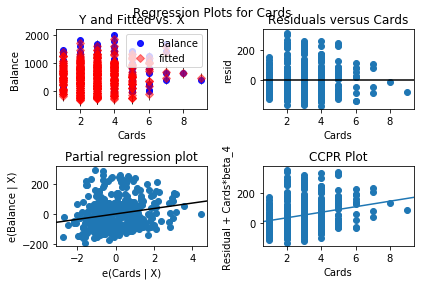

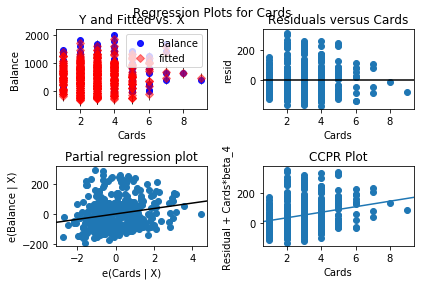

In [24]:
sm.graphics.plot_regress_exog(model5,'Cards')


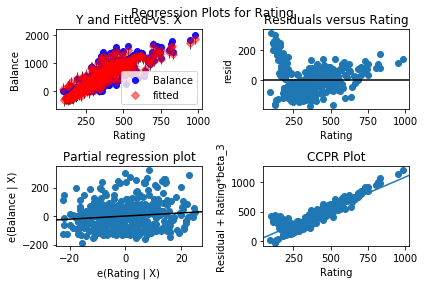

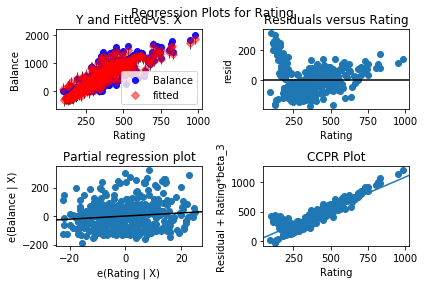

In [25]:
sm.graphics.plot_regress_exog(model5,'Rating')

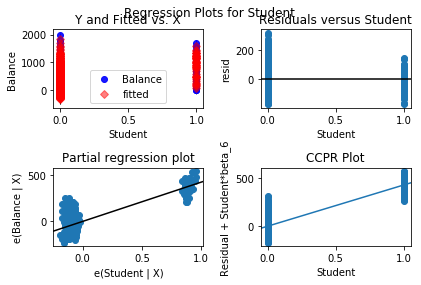

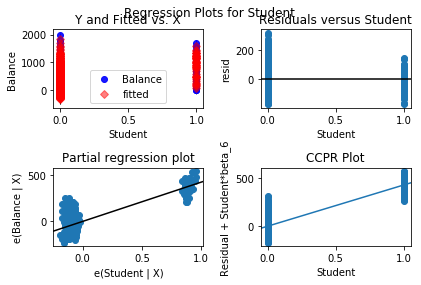

In [26]:
sm.graphics.plot_regress_exog(model5,'Student')